决策树原理：  
https://windmising.gitbook.io/liu-yu-bo-play-with-machine-learning/12-1

In [1]:
import trees
import utils
import treePlotter

# 一个简单的人造数据 --- 香农熵

In [2]:
myDat,labels = utils.createDataSet()
print (myDat)
print (labels)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
['no surfacing', 'flippers']


Expect Result:  

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]  
['no surfacing', 'flippers']

In [3]:
trees.calcShannonEnt(myDat)

0.9709505944546686

Expect Result:  
0.9709505944546686

In [4]:
myDat[0][-1]='maybe'
print (myDat)
print (trees.calcShannonEnt(myDat))

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
1.3709505944546687


Expect Result:  

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]  
1.3709505944546687

In [5]:
trees.calcShannonEnt(myDat)

1.3709505944546687

# 一个简单的人造数据 --- 划分

In [6]:
myDat,labels = utils.createDataSet()
trees.splitDataSet(myDat,0,1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

Expect Result:  
[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [7]:
trees.splitDataSet(myDat,0,0)

[[1, 'no'], [1, 'no']]

Expect Result:  
[[1, 'no'], [1, 'no']]

In [8]:
trees.chooseBestFeatureToSplit(myDat)

0

Expect Result: 0

# 一个简单的人造数据 --- 决策树

In [9]:
myDat,labels = utils.createDataSet()
myTree = trees.createTree(myDat,labels)
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

Expect Result:  
{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

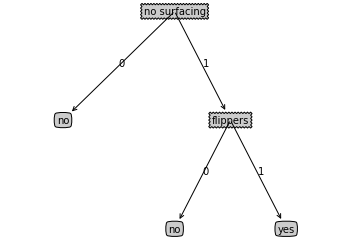

In [10]:
treePlotter.createPlot(myTree)

In [11]:
myTree['no surfacing'][3]='maybe'
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'maybe'}}

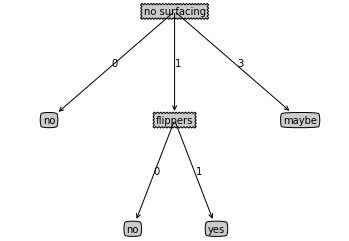

In [12]:
treePlotter.createPlot(myTree)

# 一个简单的人造数据 --- 分类

In [13]:
myDat,labels=utils.createDataSet()
myTree = trees.createTree(myDat,labels)

In [14]:
trees.classify(myTree,labels,[1,0])

'no'

In [15]:
trees.classify(myTree,labels,[1,1])

'yes'

# 一个简单的人造数据 --- 序列化

In [16]:
trees.storeTree(myTree,'classifierStorage.txt')
trees.grabTree('classifierStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

# Lenses Test

In [17]:
fr=open('lenses.txt')
lenses=[inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels=['age', 'prescript', 'astigmatic', 'tearRate']
lensesTree = trees.createTree(lenses,lensesLabels)
lensesTree

{'tearRate': {'normal': {'astigmatic': {'yes': {'prescript': {'myope': 'hard',
      'hyper': {'age': {'young': 'hard',
        'presbyopic': 'no lenses',
        'pre': 'no lenses'}}}},
    'no': {'age': {'young': 'soft',
      'presbyopic': {'prescript': {'myope': 'no lenses', 'hyper': 'soft'}},
      'pre': 'soft'}}}},
  'reduced': 'no lenses'}}

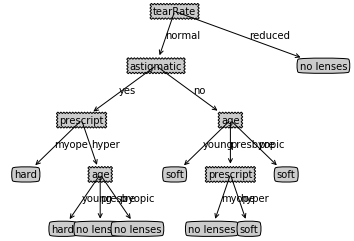

In [18]:
treePlotter.createPlot(lensesTree)

# 另一种实现

In [19]:
import trees2

# 部分代码似乎弄丢了
# tree = train(X_train, np.array(y_train))
# y_predict = classify(tree, X_test)
# accuracy = accuracy_score(y_test, y_predict)
# accuracy